## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

##*Connecting Google Drive with COLAB*

In [73]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##*Load Key Libraries*

In [0]:
# Can you see this change
# Import Basic Libraries
import numpy as np
import pandas as pd
import os

import pickle
import cv2

# To read Zip File
from zipfile import ZipFile

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import toimage

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Library to track % completion of an iteration
from tqdm import tqdm

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# For time based calculations
import time

# Import TensorFlow and Keras
import tensorflow as tf
import keras

# Import Open CV - For Image Processing
import cv2

# Import Modules from Keras for CNN Modeling
import keras.backend as k
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, Activation, Flatten, Reshape
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.optimizers import adam

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

##* Load Dataset Files*

1. Set the base directory

In [0]:
os.chdir('/content/gdrive/My Drive/AIML/Projects/Datasets/Dog_breed')

2. Extract Train, Test, Sample Submission and labels

In [0]:
#2.1 Train Data

#with ZipFile('train.zip', 'r') as z:
 #  z.extractall()

In [0]:
# 2.2 Test Data

#with ZipFile('test.zip', 'r') as z:
   #z.extractall()

In [0]:
# # 2.3 Sample Submission File

#with ZipFile('sample_submission.csv.zip', 'r') as z:
 #  z.extractall()

In [0]:
# # 2.4 Label File

#with ZipFile('labels.csv.zip', 'r') as z:
 #  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

#### Read labels.csv file using pandas

In [80]:
labels = pd.read_csv("labels.csv")
#labels = labels[:,]
print("Shape of Data:",labels.shape)
#labels.head()
#labels = labels.iloc[0:5000]
print("Shape of Data:",labels.shape)

('Shape of Data:', (10222, 2))
('Shape of Data:', (10222, 2))


#### Print the count of each category of Dogs given in the dataset



In [81]:
breed = labels.groupby("breed").count()
breed.sort_values('id', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


#### Get one-hot encodings of labels

In [82]:
Y = pd.get_dummies(labels.breed)
Y.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##*Preparing training dataset*
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

*1. Create Data Set with Labels*

In [0]:
# 1.1 Setting up Project Path

project_path = "/content/gdrive/My Drive/AIML/Projects/Datasets/Dog_breed"

In [0]:
# 1.2 Setting up the prerequisites

x_train = []
y_train =[]

img_rows = 128
img_cols = 128

num_channels = 1

In [85]:
# 1.3 Creation of training data with labels

for f, img in tqdm(labels.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))






  0%|          | 0/10222 [00:00<?, ?it/s]



  0%|          | 11/10222 [00:00<01:36, 106.09it/s]



  0%|          | 23/10222 [00:00<01:33, 108.84it/s]



  0%|          | 35/10222 [00:00<01:33, 108.95it/s]



  0%|          | 44/10222 [00:00<01:39, 102.18it/s]



  1%|          | 56/10222 [00:00<01:36, 105.37it/s]



  1%|          | 68/10222 [00:00<01:33, 108.17it/s]



  1%|          | 79/10222 [00:00<01:35, 106.20it/s]



  1%|          | 90/10222 [00:00<01:35, 106.60it/s]



  1%|          | 101/10222 [00:00<01:34, 106.59it/s]



  1%|          | 112/10222 [00:01<01:34, 106.64it/s]



  1%|          | 124/10222 [00:01<01:33, 108.39it/s]



  1%|▏         | 136/10222 [00:01<01:32, 109.61it/s]



  1%|▏         | 147/10222 [00:01<01:33, 107.75it/s]



  2%|▏         | 159/10222 [00:01<01:31, 109.79it/s]



  2%|▏         | 170/10222 [00:01<01:36, 104.45it/s]



  2%|▏         | 182/10222 [00:01<01:33, 107.30it/s]



  2%|▏         | 193/10222 [00:01<01:33, 107.00it/s]



  2%|▏ 

error: ignored

In [0]:
x_train.append(train_img_resize)
y_train.append(img)

In [87]:
len(x_train)

1

In [88]:
import pickle

pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in.close()





  6%|▌         | 573/10222 [00:20<01:30, 107.18it/s]

In [0]:
#pickle.dump(a,fileObject)

In [90]:
len(x_train)

10222

In [91]:
len(y_train)

10222

In [92]:
# 1.4 Shape of Image

img_num = 5

print("Training Object Shape:")
print("Train X:",x_train[img_num].shape)

Training Object Shape:
('Train X:', (128, 128, 3))


Image Visualization

In [0]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(10,10),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(10)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

In [0]:
img_width=128
img_height=128
images=[]
classes=[]

Images to show: 9
Classes to show: 9


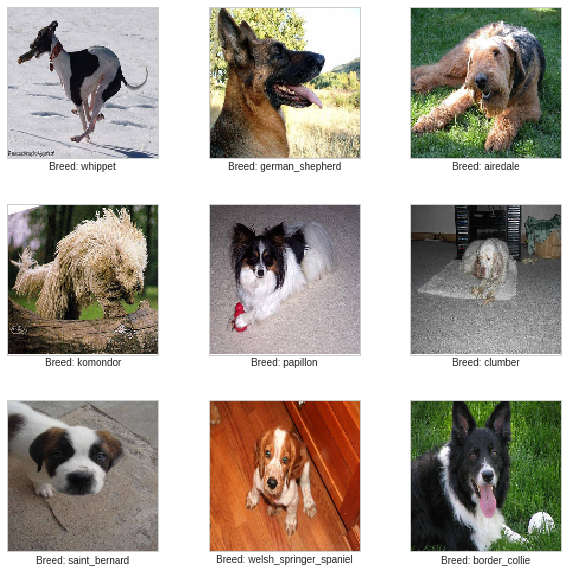

In [95]:
# select random images

from random import randint

random_numbers = [randint(0, len(x_train)) for p in range(0,9)]
images_to_show = [x_train[i] for i in random_numbers]
classes_to_show = [y_train[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))

#plot the images
plot_images(images_to_show, classes_to_show)

In [96]:
# 1.5 One hot Encoding for y_train
y_train = pd.get_dummies(y_train)
print("Train Y:",y_train.shape,"\n")

('Train Y:', (10222, 120), '\n')


In [0]:
# 1.6 converting into numpy array

x_train = np.array(x_train, dtype='single')
y_train = np.array(y_train)

### Split the training and validation data from `x_train` and `y_train` obtained from above step

1. Split in train and validation data

In [98]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print("Shape of Training Set:",x_train2.shape)
print("Shape of Training Labels:",y_train2.shape)
print("Shape of Validation Set:",x_val.shape)
print("Shape of Validation Label:",y_val.shape)

('Shape of Training Set:', (8177, 128, 128, 3))
('Shape of Training Labels:', (8177, 120))
('Shape of Validation Set:', (2045, 128, 128, 3))
('Shape of Validation Label:', (2045, 120))


2. Normalize the Data

In [0]:
x_train2 = x_train2/255
x_val = x_val/255

In [100]:
x_train2

array([[[[0.09803922, 0.13725491, 0.10588235],
         [0.08627451, 0.1254902 , 0.09803922],
         [0.07843138, 0.10980392, 0.09803922],
         ...,
         [0.09803922, 0.09803922, 0.15686275],
         [0.08627451, 0.08235294, 0.12941177],
         [0.09803922, 0.09019608, 0.12941177]],

        [[0.20784314, 0.23921569, 0.2       ],
         [0.20392157, 0.22745098, 0.2       ],
         [0.23529412, 0.25490198, 0.23529412],
         ...,
         [0.06666667, 0.08235294, 0.14117648],
         [0.08627451, 0.09411765, 0.14509805],
         [0.09019608, 0.09803922, 0.14117648]],

        [[0.4       , 0.4117647 , 0.38431373],
         [0.41960785, 0.43137255, 0.40784314],
         [0.39607844, 0.4       , 0.38431373],
         ...,
         [0.08627451, 0.11764706, 0.17254902],
         [0.0627451 , 0.09019608, 0.14117648],
         [0.06666667, 0.08627451, 0.12941177]],

        ...,

        [[0.02352941, 0.05882353, 0.04313726],
         [0.01176471, 0.02745098, 0.07843138]

3. Reshape the data

In [101]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)

print("Shape of Training Set:",x_train2.shape)
print("Shape of Training Labels:",y_train2.shape)
print("Shape of Validation Set:",x_val.shape)
print("Shape of Validation Label:",y_val.shape)

('Shape of Training Set:', (8177, 128, 128, 3))
('Shape of Training Labels:', (8177, 120))
('Shape of Validation Set:', (2045, 128, 128, 3))
('Shape of Validation Label:', (2045, 120))


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
# testlabels = pd.read_csv(project_path+'sample_submission.csv')
# test_img = testlabels.id.astype(str)
# test_img.head()

Run the below code to load the test image files in x_test_feature

In [0]:
# x_test = []
# i = 0 # initialisation
# for f in tqdm(test_img.values): # f for format ,jpg
#     img = cv2.imread('./test/{}.jpg'.format(f), 1)
#     img_resize = cv2.resize(img, (img_rows, img_cols)) 
#     x_test.append(img_resize)

In [0]:
# # Image Visualization - Training Image

# img_num = 5
# plt.imshow(x_test[img_num])

In [0]:
# # Covert into numpy array

# x_test = np.array(x_test)

In [0]:
# # Shape of Image

# print("Test Object Shape:")
# print("Test X:",x_test[img_num].shape)

In [0]:
# # Normalize the Test Data

# x_test = x_test/255

In [0]:
# # Reshape Test Data

# x_test = x_test.reshape(x_test.shape[0],128,128,3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
model = Sequential()

#model.add(BatchNormalization(input_shape = (128,128,3)))

model.add(Convolution2D(filters=64, kernel_size=5, padding = 'same',  input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=3))

model.add(Convolution2D(filters=32, kernel_size=3, padding ='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=256,activation = 'relu'))

model.add(Dense(units = 120, activation = 'softmax'))

# Loss and Optimizer
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 10

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               3612928   
_________________________________________________________________
dense_6 (Dense)              (None, 120)               30840     
Total para

In [112]:
model.fit(x_train2, y_train2, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_val, y_val), callbacks=callback_list)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 11s 1ms/step - loss: 4.7749 - acc: 0.0158 - val_loss: 4.6954 - val_acc: 0.0244
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/step - loss: 4.5274 - acc: 0.0368 - val_loss: 4.5010 - val_acc: 0.0372
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/step - loss: 4.2567 - acc: 0.0647 - val_loss: 4.4547 - val_acc: 0.0440
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/step - loss: 3.9143 - acc: 0.1214 - val_loss: 4.5077 - val_acc: 0.0474
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/step - loss: 3.2411 - acc: 0.2491 - val_loss: 4.9877 - val_acc: 0.0509
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/step - loss: 2.2185 - acc: 0.4663 - val_loss: 5.6352 - val_acc: 0.0455
Epoch 7/10
8177/8177 [==============================] - 9s 1ms/step - loss: 1.1084 - acc: 0.7301 - val_loss: 6.8311 - val_acc: 0.0421
Epoch 8/10
81

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
# Data Augumentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip = True)

val_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip = True)

In [0]:
train_datagen.fit(x_train2)

In [0]:
val_datagen.fit(x_val)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(x_train2,y_train2,batch_size=32)
val_generator= val_datagen.flow(x_val,y_val)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [117]:
model.fit_generator(train_generator,steps_per_epoch=len(x_train2)/32, epochs=10,
          validation_data=(x_val,y_val))

Epoch 1/10
255/255 [==============================] - 36s 139ms/step - loss: 4.8849 - acc: 0.0109 - val_loss: 4.7860 - val_acc: 0.0117
Epoch 2/10
255/255 [==============================] - 34s 134ms/step - loss: 4.7832 - acc: 0.0121 - val_loss: 4.7891 - val_acc: 0.0112
Epoch 3/10
255/255 [==============================] - 35s 137ms/step - loss: 4.7801 - acc: 0.0132 - val_loss: 4.7870 - val_acc: 0.0117
Epoch 4/10
255/255 [==============================] - 35s 137ms/step - loss: 4.7784 - acc: 0.0125 - val_loss: 4.7875 - val_acc: 0.0117
Epoch 5/10
255/255 [==============================] - 34s 135ms/step - loss: 4.7768 - acc: 0.0126 - val_loss: 4.7878 - val_acc: 0.0117
Epoch 6/10
255/255 [==============================] - 34s 134ms/step - loss: 4.7771 - acc: 0.0124 - val_loss: 4.7883 - val_acc: 0.0117
Epoch 7/10
255/255 [==============================] - 35s 138ms/step - loss: 4.7762 - acc: 0.0124 - val_loss: 4.7883 - val_acc: 0.0117
Epoch 8/10
255/255 [==============================] - 3

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [119]:
x_train2.shape

(8177, 128, 128, 3)

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
# Instantiate the model with the pre-trained weights (no top)
# base_model= VGG16(weights='imagenet',
#                  include_top=False, input_shape=(3, 128, 128))

base_model = VGG16(weights='imagenet', include_top=False, input_shape=( 128, 128,3))


Print the summary of the base_model

In [123]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
k.set_image_dim_ordering('th')

In [0]:
# Freeze the layers which you don't want to train
for layer in base_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = base_model.output 
x = Flatten()(x)

x = Dropout(0.3)(x)
x = Dense(1204, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(120, activation="softmax")(x)

# optimizers : SGD(lr=0.001, momentum=0.9)
  
 
# x = Dense(1024, activation="relu")(x)
# x = 
# x = Dense(256, activation="relu")(x)
# predictions = Dense(120, activation="softmax")(x)

# creating the final model 
model_final = Model(input = base_model.input, output = predictions)

# compile the model 
# model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001), metrics=["accuracy"])
model_final.compile(loss = "categorical_crossentropy", optimizer = "RMSProp", metrics=["accuracy"])

### Make all the layers in the base_model (VGG16) to be non-trainable

In [126]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# x_train2 = x_train2.transpose(0,3, 1, 2)
# x_val = x_val.transpose(0,3, 1, 2)

In [0]:
#y_train2 = pd.get_dummies(y_train2)
#y_val = pd.get_dummies(y_val)

In [130]:
batch_size = 128
nb_epochs = 10
history = model_final.fit(x_train2,y_train2,
                    batch_size = batch_size,
                    epochs=30, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/30
8177/8177 [==============================] - 31s 4ms/step - loss: 5.3942 - acc: 0.0204 - val_loss: 4.5383 - val_acc: 0.0430
Epoch 2/30
8177/8177 [==============================] - 30s 4ms/step - loss: 4.3789 - acc: 0.0644 - val_loss: 4.1344 - val_acc: 0.0944
Epoch 3/30
8177/8177 [==============================] - 30s 4ms/step - loss: 3.9057 - acc: 0.1117 - val_loss: 3.7276 - val_acc: 0.1692
Epoch 4/30
8177/8177 [==============================] - 30s 4ms/step - loss: 3.5467 - acc: 0.1653 - val_loss: 3.5215 - val_acc: 0.1848
Epoch 5/30
8177/8177 [==============================] - 30s 4ms/step - loss: 3.2482 - acc: 0.2189 - val_loss: 3.4253 - val_acc: 0.2029
Epoch 6/30
8177/8177 [==============================] - 30s 4ms/step - loss: 3.0103 - acc: 0.2566 - val_loss: 3.3016 - val_acc: 0.2039
Epoch 7/30
8177/8177 [==============================] - 30s 4ms/step - loss: 2.8038 - acc: 0.3026 - val_loss: 3.2846 - val_acc: 0.2244
Epoch 8

In [131]:
model_final.fit_generator(train_generator,steps_per_epoch=len(x_train2)/32, epochs=10,
          validation_data=(x_val,y_val))

Epoch 1/10
255/255 [==============================] - 47s 186ms/step - loss: 4.5809 - acc: 0.0712 - val_loss: 3.7171 - val_acc: 0.1609
Epoch 2/10
255/255 [==============================] - 50s 197ms/step - loss: 4.4192 - acc: 0.0750 - val_loss: 3.8596 - val_acc: 0.1447
Epoch 3/10
255/255 [==============================] - 47s 184ms/step - loss: 4.3932 - acc: 0.0781 - val_loss: 3.7519 - val_acc: 0.1643
Epoch 4/10
255/255 [==============================] - 46s 182ms/step - loss: 4.4031 - acc: 0.0711 - val_loss: 3.7779 - val_acc: 0.1653
Epoch 5/10
255/255 [==============================] - 47s 183ms/step - loss: 4.3886 - acc: 0.0764 - val_loss: 3.8603 - val_acc: 0.1643
Epoch 6/10
255/255 [==============================] - 47s 183ms/step - loss: 4.3813 - acc: 0.0813 - val_loss: 3.8444 - val_acc: 0.1677
Epoch 7/10
255/255 [==============================] - 46s 182ms/step - loss: 4.4029 - acc: 0.0792 - val_loss: 3.8447 - val_acc: 0.1589
Epoch 8/10
255/255 [==============================] - 4